In [1]:

!pip install asteval  # convertir lo que ingresa en el teclado en una función 


  Created wheel for asteval: filename=asteval-0.9.25-cp37-none-any.whl size=17301 sha256=2e9447192874d3e4b9e818fdc3911ea3a4c692f234a649fe7cb3c689ebae1eae
  Stored in directory: /root/.cache/pip/wheels/75/4e/83/fb48cc07d800283881ee75940ac6d7bae561305b3545e07785
Successfully built asteval


 Menú Metodos De Integración (Integrales Definidas) 
la integral exacta es -1.27365468206367
 para usar metodo de trapecio ingrese      1 
 para usar metodo de simpson 1/3 ingrese   2
 para usar metodo de simpson 3/8 ingrese   3  
 para usar metodo de sumas, superiores ingrese 4, inferiores ingrese 5 
 para usar metodo de sumas, por derecha ingrese 6, por izquierda  ingrese 7 
 para GRAFICAR una función ingrese 8, para SALIR ingrese 0


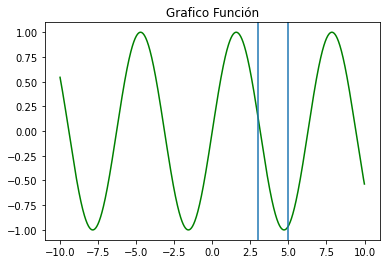

In [ ]:
import numpy as np # tener funciones de todo tipo, numpy.pi o numpu.cos(x)
import matplotlib.pyplot as plt # para graficar 
import sympy # calculadora algebraica 
from sympy import S, symbols
from sympy.utilities.lambdify import lambdify # convertir entradas 
from scipy import *
from scipy import integrate
from asteval import Interpreter # convertir lo que entra en el teclado en funcion 
from math import* #calculadora
from pylab import *  #
aeval=Interpreter()

print(" Menú Metodos De Integración (Integrales Definidas) ")
print("==============================")
#datos de entada 
s=str(input("ingrese la función a integrar :"))  # f(x)
n=int(input("ingrese n (número de pasos )  :")) # numero de pasos 
la=float(input("limite inferior            :")) # limites 
lb=float(input("limite superior            :"))
r=str("'"+s+"'") #convierto a orden de riemman, entra como 'f(x)'
print("==============================")

# formula integral exacta 

x = sympy.Symbol('x') # leer la funcion 
y=s # f(x)
integralexacta=sympy.integrate(y,(x,la,lb))


#formula simpson 3/8

def simpson38(x0,xn,n):
    h = (xn - x0) / n
    integration = f(x0) + f(xn)
    for i in range(1,n):
        k = x0 + i*h
        if i%2 == 0:
            integration = integration + 2 * f(k)
        else:
            integration = integration + 3 * f(k)
    integration = integration * 3 * h / 8
    return integration

#formual se simpson 1/3


def fx(x, f):
    return eval(f)

def simpson13(n, a, b, f):
    h = (b - a) / n #formila de simpson 
    suma=0
    for i in range(1,n): #iterar 
        x = a + i * h
        if(i % 2 == 0):
            suma = suma + 2 * fx(x, f)
        else:
            suma = suma + 4 * fx(x, f)
    suma = suma + fx(a, f) + fx(b, f)
    rest = suma * (h / 3)
    return (rest) 

# formula del trapecio
def lambdifye(fstring):  #convierto lo que entra
  def f(x):
     aeval.symtable['x']=x
     return aeval(fstring)
  return f
  
def trapecio_compuesto(f, A, B, n):
    k = 1
    valor = 0
    compuesta = 0
    while k <= n - 1:
        c = A + k*(B-A)/n
        valor += f(c)
        k += 1
        compuesta = ((B-A)/n)*((f(A) + f(B))/2.0 + valor)
    return compuesta
fstring=s
f=lambdifye(fstring)
#formula de riemman sumas superiores 

def riemannsup(f, a, b, ra, rb, n):
    x = symbols('x')
    f = lambdify(x, S(f),'numpy')
    delta_x = (rb-ra)/n 
    riemannx = np.arange(ra-1, rb,(delta_x))
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)
    return riemann_sum

#formula de riemman sumas inferiores 

def riemanninf(f, a, b, ra, rb, n):
    x = symbols('x')
    f = lambdify(x, S(f),'numpy')
    delta_x = (rb-ra)/n 
    riemannx = np.arange(ra+1, rb,(delta_x))
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)
    return riemann_sum

# formula de riemman punto medio por izquierda 
def riemannizq(f, a, b, ra, rb, n):
    x = symbols('x')
    f = lambdify(x, S(f),'numpy')
    delta_x = (rb-ra)/n 
    riemannx = np.arange(ra+(delta_x), rb,(delta_x))
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)
    return riemann_sum

# formula de riemann punto medio derecha 

def riemannder(f, a, b, ra, rb, n):
    x = symbols('x')
    f = lambdify(x, S(f),'numpy')
    delta_x = (rb-ra)/n   # delta de x 
    riemannx = np.arange(ra-(delta_x), rb,(delta_x))
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)
    return riemann_sum

#formula del error 
def error(a,b): #integral exacta y b= aproximacion 
  error=np.abs((a-b)/a)*100 # error obsoluto 
  return error

# graficas 
def graficar(la,lb): 
  x=np.arange(-10,10,0.01)#rango del dibujo , limites del eje x 
  y=lambdifye(input(" la función que desea graficar es :"))(x)
  plt.plot(x,y, color='green')
  plt.axvline(x=la)  
  plt.axvline(x=lb)  
  plt.title("Grafico Función")
  plt.show()








print("============================")







# creacion del menu

print(f"la integral exacta es {integralexacta}")
print("========================================")
print(" para usar metodo de trapecio ingrese      1 ")
print(" para usar metodo de simpson 1/3 ingrese   2")
print(" para usar metodo de simpson 3/8 ingrese   3  ")
print(" para usar metodo de sumas, superiores ingrese 4, inferiores ingrese 5 ")
print(" para usar metodo de sumas, por derecha ingrese 6, por izquierda  ingrese 7 ")
print(" para GRAFICAR una función ingrese 8, para SALIR ingrese 0")
print("====================================================================================")
p=input("ingrese opción    :")
while p!="0":
  if p=="1":
    print(trapecio_compuesto(f,la,lb,n)," integral por metodo de trapecio")
    print(error(integralexacta,trapecio_compuesto(f,la,lb,n)),"%"," error  por metodo del trapecio")
    print("========================================")
  elif p=="2":
    print(simpson13(n,la,lb,s)," integral por regla de simpson  1/3")
    print(error(integralexacta,simpson13(n,la,lb,s)),"%","  error por regla de  simpson 1/3")
    print("========================================")
  elif p=="3":
    print(simpson38(la,lb,n)," integral por regla de  simpson 3/8")
    print(error(integralexacta,simpson38(la,lb,n)),"%","  error por regla de simpson 3/8")
    print("========================================")
  elif p=="4":
    print(riemannsup(s, 0,0, la, lb,n),"integral por sumas superiores ")
    print(error(integralexacta,riemannsup(s, 0,0, la, lb,n)),"%"," error por  sumas superiores")
    print("========================================")
  elif p=="5":
    print(riemanninf(s, 0,0, la, lb,n),"integral por sumas inferiores ")
    print(error(integralexacta,riemanninf(s, 0,0, la, lb,n)),"%"," error por sumas inferiores ")
    print("========================================")
  elif p=="6":
    print(riemannder(s, 0,0, la, lb,n),"integral por sumas derechas")
    print(error(integralexacta,riemannder(s, 0,0, la, lb,n)),"%"," error de sumas por derecha ")
    print("========================================")
  elif p=="7":
    print(riemannizq(s, 0,0, la, lb,n),"integral por sumas izquierdas")
    print(error(integralexacta,riemannizq(s, 0,0, la, lb,n)),"%"," error de sumas por izquierda")
    print("========================================")
  elif p=="8":
    graficar(la,lb)
    print("========================================")
  p=input("ingrese opción         :")


